Expectations/Steps:-

-	Apply Data Cleaning to the Datasets and then apply k-means, Agglomerative clustering to find pattern and the best value for the following features.
-	Build a classification model on k-means, agglomerative clustering


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('column_2C_weka.csv')
df = df.sample(frac=1,random_state=4).reset_index(drop=True)
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,58.101935,14.837639,79.649838,43.264295,113.587655,50.237878,Abnormal
1,56.447026,19.444499,43.577846,37.002527,139.189690,-1.859689,Normal
2,92.026308,35.392674,77.416963,56.633634,115.723530,58.057542,Abnormal
3,38.663257,12.986441,40.000000,25.676816,124.914118,2.703008,Abnormal
4,38.697912,13.444749,31.000000,25.253163,123.159251,1.429186,Abnormal


## EDA

In [3]:
df.shape

(310, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [7]:
df['class']= df['class'].map({'Abnormal': 1, 'Normal' :0})
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,58.101935,14.837639,79.649838,43.264295,113.587655,50.237878,1
1,56.447026,19.444499,43.577846,37.002527,139.189690,-1.859689,0
2,92.026308,35.392674,77.416963,56.633634,115.723530,58.057542,1
3,38.663257,12.986441,40.000000,25.676816,124.914118,2.703008,1
4,38.697912,13.444749,31.000000,25.253163,123.159251,1.429186,1


In [8]:
y=df['class']
x=df.drop('class',axis=1)

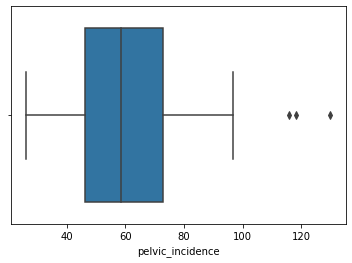

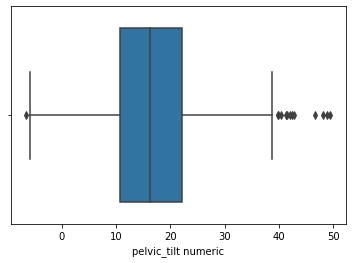

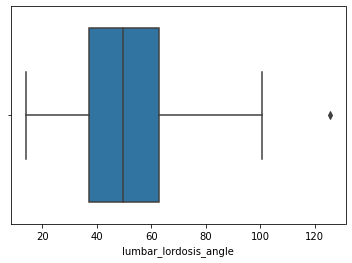

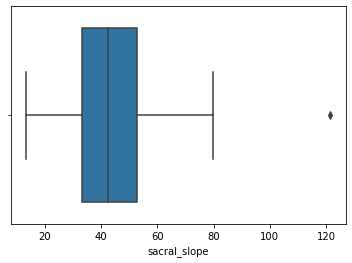

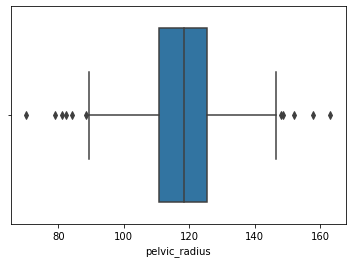

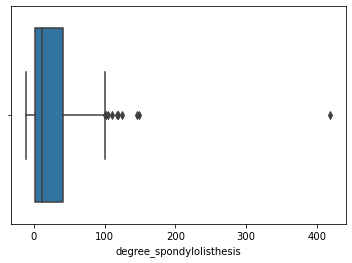

In [9]:
cols=list(x.columns)
for col in cols:
  sns.boxplot(df[col])
  plt.show()

In [10]:
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
iqr = q3 - q1

x= x[~(x>(q3+1.5*iqr))]

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          307 non-null    float64
 1   pelvic_tilt numeric       298 non-null    float64
 2   lumbar_lordosis_angle     309 non-null    float64
 3   sacral_slope              309 non-null    float64
 4   pelvic_radius             305 non-null    float64
 5   degree_spondylolisthesis  300 non-null    float64
dtypes: float64(6)
memory usage: 14.7 KB


In [12]:
x.isnull().sum()

pelvic_incidence             3
pelvic_tilt numeric         12
lumbar_lordosis_angle        1
sacral_slope                 1
pelvic_radius                5
degree_spondylolisthesis    10
dtype: int64

In [13]:
x=x.fillna(method='ffill')

In [14]:
x.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
dtype: int64

## Hierarchical Clustering(Agglomerative)

In [15]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.preprocessing import StandardScaler

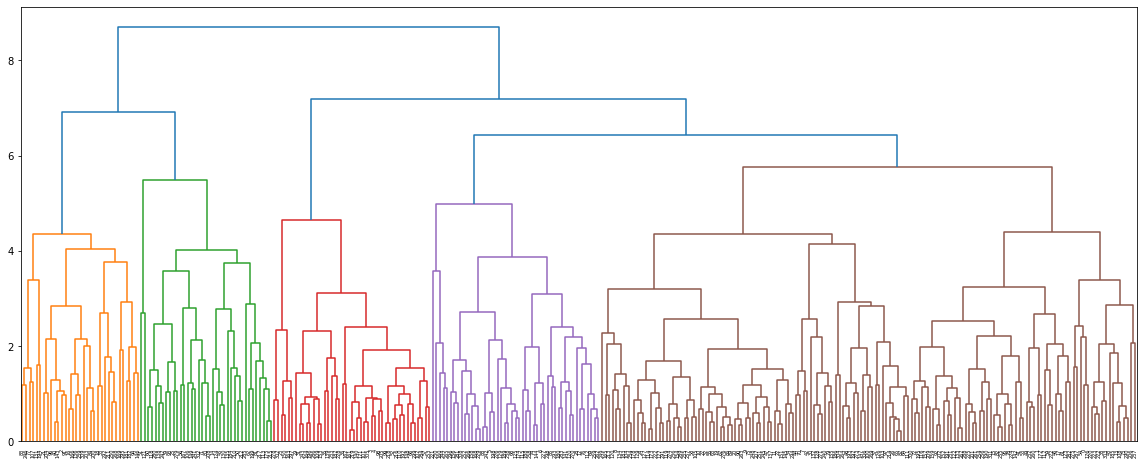

In [16]:
ss=StandardScaler()
xs=ss.fit_transform(x)

plt.figure(figsize=(20,8))
mergings = linkage(xs,method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [17]:
clustercut = pd.Series(cut_tree(mergings,n_clusters=2).reshape(-1,))
clustercut.value_counts()

0    240
1     70
dtype: int64

## KMeans Clustering


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

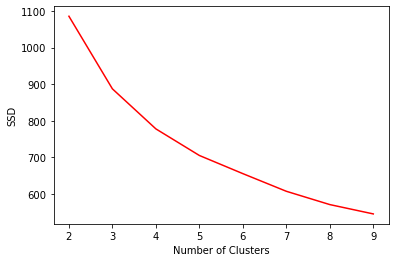

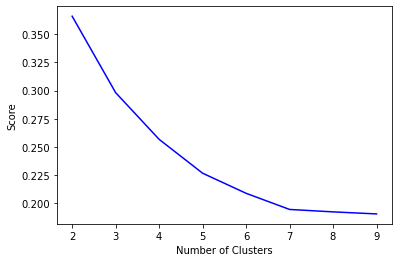

In [19]:
ssd=[]
score=[]

for k in range(2,10):
  kmeans=KMeans(n_clusters=k,random_state=4)
  kmeans.fit(xs)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  score.append(silhouette_score(xs,labels))

plt.plot(range(2,10),ssd,'r')
plt.xlabel("Number of Clusters")
plt.ylabel("SSD")
plt.show()

plt.plot(range(2,10),score,'b')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.show()



- ELBOW Result is quiet vague as some indication of elbows seems to be there for 4,5 and 6 cluster solutions.
- Examining Silhoutte Score ,we notice slight upward trend for cluster-5.Hence 5 cluster solution may be the best number of clusters.



In [20]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(xs,y)
labels=kmeans.labels_

In [21]:
df['cluster_kmeans']=labels

In [22]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,cluster_kmeans
0,58.101935,14.837639,79.649838,43.264295,113.587655,50.237878,1,0
1,56.447026,19.444499,43.577846,37.002527,139.189690,-1.859689,0,1
2,92.026308,35.392674,77.416963,56.633634,115.723530,58.057542,1,0
3,38.663257,12.986441,40.000000,25.676816,124.914118,2.703008,1,1
4,38.697912,13.444749,31.000000,25.253163,123.159251,1.429186,1,1


In [23]:
pd.crosstab(df['class'],df['cluster_kmeans'])

cluster_kmeans,0,1
class,,
0,10,90
1,119,91


- Cluster-1 mostly consist of class 1.
- Cluster-0 is almost an equal mix of class-0 and class-1

